In [1]:
cd ~/repos/jpegCompress/

/home/wenfeng/repos/jpegCompress


In [3]:
import numpy as np
import matplotlib.pyplot as plt

import jpegcompress as jc

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Read in the Image

In [6]:
rgb = jc.read_image('/home/wenfeng/Downloads/lena.png')[..., :3]

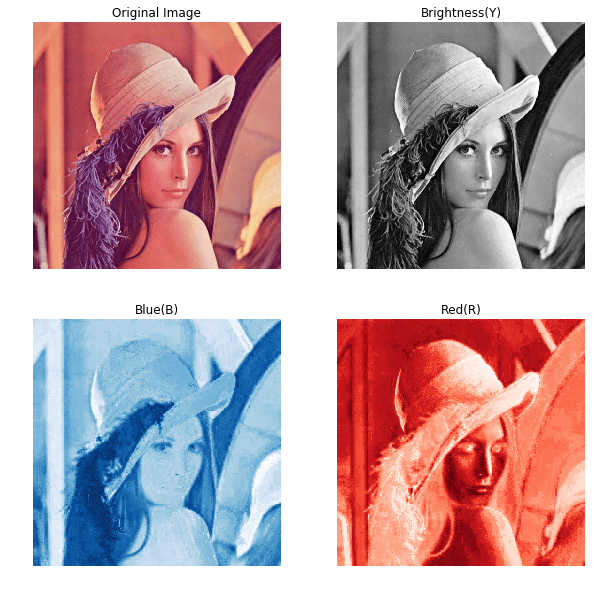

In [145]:
yuv = jc.rgb2yuv(rgb)
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
axes = axes.flatten()

axes[0].imshow(rgb)
axes[0].set_title('Original Image')
axes[1].imshow(yuv[..., 0], cmap='gray')
axes[1].set_title('Brightness(Y)')
axes[2].imshow(yuv[..., 1], cmap=plt.cm.Blues)
axes[2].set_title('Blue(B)')
axes[3].imshow(yuv[..., 2], cmap=plt.cm.Reds)
axes[3].set_title('Red(R)')

for ax in axes: ax.axis('off')

## JPEG Compress

In [150]:
jpeg_rgb = jc.jpeg_decompress(jc.jpeg_compress(rgb))

diff = np.abs(jpeg_rgb - rgb)

print('Max Error:', diff.max())

Max Error: 255


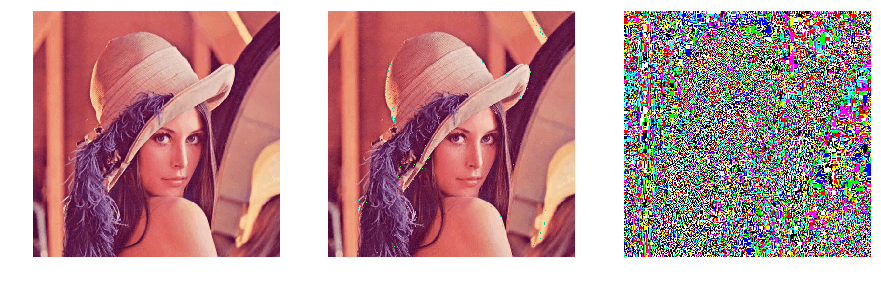

In [151]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(rgb)
axes[1].imshow(jpeg_rgb)
axes[2].imshow(diff)

for ax in axes: ax.axis('off')